In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from pprint import pp

from utils import CONFIG

In [19]:
top_k = 50

drop_columns = [
    "device",
    "learning_rate",
    "batch_size",
    "top_k",
    "seed",
    "epochs",
    "datasets",
    "log"
]

if False:
    for k in CONFIG.top_k:
        if k != top_k:
            drop_columns.extend([f"Precision@{k}", f"Recall@{k}", f"NDCG@{k}"])

print(drop_columns)

['device', 'learning_rate', 'batch_size', 'top_k', 'seed', 'epochs', 'datasets', 'log']


In [20]:
files = os.listdir("logs")
settings = {}

for fname in files:
    with open(f"logs/{fname}", "r", encoding="utf-8") as fin:
        lines = list(fin)
        epochs, train_loss, val_loss, *res = lines[-1].strip().split("\t")

        s = lines[0].split("alpha:")
        lines[0] = s[0]

        d = json.loads(lines[0])

        if len(s) == 2:
            alpha = s[1]
            d["Alpha"] = alpha

        d["Epochs"] = int(epochs)
        d["T-Loss"] = float(train_loss)
        d["V-Loss"] = float(val_loss)

        for i, k in enumerate(CONFIG.top_k):
            precision, recall, ndcg = res[i * 3:(i * 3)+3]
            d[f"Precision@{k}"] = float(precision)
            d[f"Recall@{k}"] = float(recall)
            d[f"NDCG@{k}"] = float(ndcg)

        settings[fname[:-4]] = d

df = pd.DataFrame(settings).T.convert_dtypes()
df = df.drop(columns=drop_columns)

df

,multimodal,embedding_dim,n_layers,dataset,alpha,autoencoder,ensemble_fusion,freeze,fusion_modalities,fusion_type,...,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50,Alpha
2025-06-17T09:34:41,False,512,2,dbbook,False,False,False,False,mean,late,...,0.0483,0.0763,0.0759,0.0366,0.1139,0.0907,0.0241,0.1813,0.1155,<NA>
2025-03-04T17:14:29,False,512,0,ml1m,False,False,False,True,mean,late,...,0.1405,0.1177,0.1718,0.1199,0.1904,0.1859,0.0915,0.3385,0.2338,<NA>
2025-03-04T17:12:51,False,512,0,dbbook,False,False,False,True,mean,late,...,0.0444,0.0706,0.07,0.033,0.1028,0.0827,0.0221,0.1676,0.1063,<NA>
2025-03-02T15:38:28,True,512,1,dbbook,False,False,False,True,mean,late,...,0.0587,0.094,0.0917,0.0435,0.1356,0.1081,0.0286,0.2193,0.1382,<NA>
2025-03-02T15:53:41,True,512,1,ml1m,False,False,False,True,mean,late,...,0.1865,0.1569,0.2284,0.1566,0.2468,0.2445,0.1145,0.4127,0.2979,<NA>
2025-03-02T15:46:27,True,512,2,dbbook,False,False,False,True,mean,late,...,0.0596,0.0944,0.0918,0.0444,0.138,0.1089,0.0293,0.2242,0.1399,<NA>
2025-03-09T10:48:12,True,512,1,dbbook,False,False,False,False,mean,late,...,0.0532,0.085,0.0833,0.0397,0.1244,0.0988,0.026,0.199,0.1258,<NA>
2025-03-06T08:06:34,True,512,0,ml1m,False,False,False,True,mean,late,...,0.1892,0.1585,0.2323,0.1577,0.2488,0.2473,0.1139,0.4119,0.2986,<NA>
2025-03-09T10:50:57,True,512,2,dbbook,False,False,False,False,mean,late,...,0.0539,0.0864,0.0842,0.0405,0.1269,0.1002,0.0264,0.2016,0.1273,<NA>
2025-03-02T22:49:39,True,512,3,ml1m,False,False,False,True,mean,late,...,0.198,0.1603,0.2411,0.1648,0.2514,0.2548,0.1197,0.4182,0.307,<NA>


In [21]:
df.where((df["dataset"] == "ml1m") & (df["multimodal"] == True) & (df["alpha"] == False)).drop(columns=["dataset", "alpha", "autoencoder", "embedding_dim", "ensemble_fusion", "freeze", "fusion_modalities", "info_nce", "single_branch", "Epochs", "fusion_type", "Alpha"]).dropna().drop_duplicates()

,multimodal,n_layers,normalized,T-Loss,V-Loss,Precision@5,Recall@5,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50


In [22]:
file = list(sorted(os.listdir("logs")))[-1]
#file = "2025-03-06T08:20:58.log"
file_path = f"logs/{file}"

with open(file_path, 'r') as f:
    config_line = f.readline().strip()
    config_line = config_line.split("alpha:")[0]
    config = json.loads(config_line)

data = pd.read_csv(file_path, sep='\t', skiprows=1)

In [23]:
epochs = data["Epoch"]
train_loss = data["T-Loss"]
val_loss = data["V-Loss"]

{'device': 'cuda:1',
 'multimodal': False,
 'embedding_dim': 512,
 'n_layers': 2,
 'epochs': 500,
 'learning_rate': 0.001,
 'log': True,
 'seed': 19,
 'top_k': [5,
           10,
           20,
           50],
 'dataset': 'ml1m',
 'batch_size': 4096,
 'alpha': False,
 'autoencoder': False,
 'ensemble_fusion': False,
 'freeze': False,
 'fusion_modalities': 'mean',
 'fusion_type': 'late',
 'info_nce': False,
 'normalized': False,
 'single_branch': False,
 'datasets': {'dbbook': ['images',
                         'text'],
              'ml1m': ['audio',
                       'images',
                       'text',
                       'video']}}

Epoch           500.0000
T-Loss            0.0645
V-Loss            0.3948
Precision@5       0.2362
Recall@5          0.0982
NDCG@5            0.2563
Precision@10      0.2010
Recall@10         0.1619
NDCG@10           0.2484
Precision@20      0.1622
Recall@20         0.2502
NDCG@20           0.2572
Precision@50      0.1142
Recall@50         

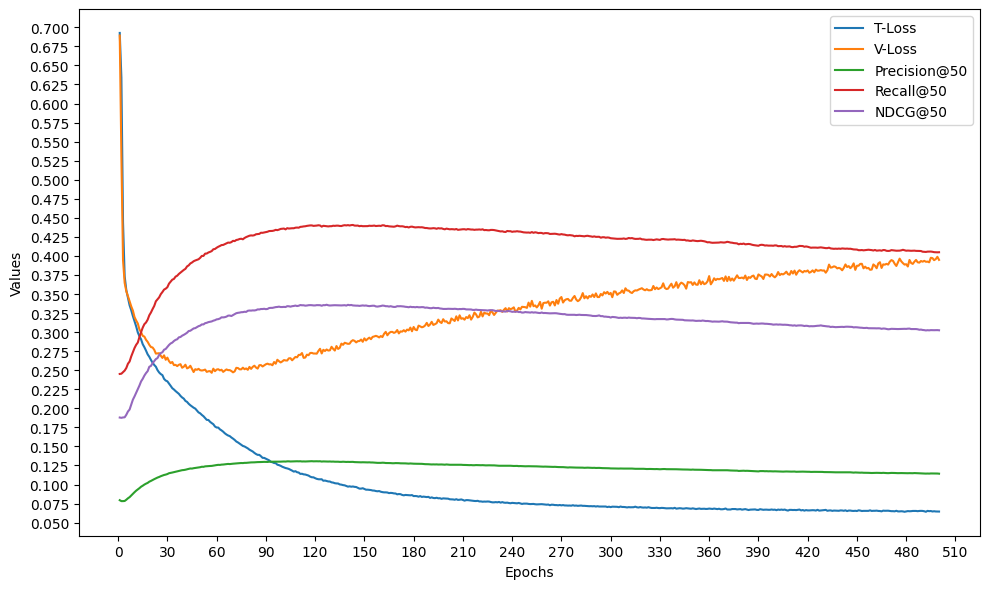

In [24]:
pp(config, width=1)
print()
print(data.iloc[-1])

plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, label="T-Loss")
plt.plot(epochs, val_loss, label="V-Loss")

for k in [50]:
    plt.plot(epochs, data[f"Precision@{k}"], label=f"Precision@{k}")
    plt.plot(epochs, data[f"Recall@{k}"], label=f"Recall@{k}")
    plt.plot(epochs, data[f"NDCG@{k}"], label=f"NDCG@{k}")


plt.xlabel('Epochs')
plt.ylabel('Values')
#plt.title(file_path)
plt.legend()

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=30))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
#plt.yscale("log")

plt.tight_layout()
plt.show()